In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housedata/output.csv
/kaggle/input/housedata/data.csv
/kaggle/input/housedata/data.dat
/kaggle/input/feature-engineering-for-house-prices/__results__.html
/kaggle/input/feature-engineering-for-house-prices/my_submission.csv
/kaggle/input/feature-engineering-for-house-prices/__resultx__.html
/kaggle/input/feature-engineering-for-house-prices/__notebook__.ipynb
/kaggle/input/feature-engineering-for-house-prices/__output__.json
/kaggle/input/feature-engineering-for-house-prices/custom.css
/kaggle/input/feature-engineering-for-house-prices/__results___files/__results___39_0.png
/kaggle/input/boston-house-prices/housing.csv


In [2]:
#import libary
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#import data
df = pd.read_csv("/kaggle/input/housedata/data.csv")

In [4]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [6]:
df.shape

(4600, 18)

In [7]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [8]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [9]:
df.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

In [10]:
#duplicated
df.duplicated().sum()

0

In [11]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [12]:
#hapus feature yang tidak digunakan
df = df.drop(columns=['yr_built', 'yr_renovated', 'street', 'city',
                 'statezip', 'country'])

In [13]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800
...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020


In [14]:
df.price.max()

26590000.0

In [15]:
df.price.min()

0.0

In [16]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000


In [17]:
df.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
dtype: int64

In [18]:
categorical = ['date']
numerical = []

In [19]:
numerical = [x for x in df.columns if x not in categorical]
numerical

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'sqft_above',
 'sqft_basement']

In [20]:
#menangani outlier menggunakan ZScore
from scipy import stats

In [21]:
print (f'jumlah baris sebelum melfilter outlier: {len(df)}')
filtered_enteries = np.array([True] * len(df))

jumlah baris sebelum melfilter outlier: 4600


In [22]:
for col in numerical:
    zscore = abs(stats.zscore(df[col]))
    filtered_enteries = (zscore<3) & filtered_enteries

df2=df[filtered_enteries]
print (f'jumlah baris sesudah melfilter outlier: {len(df2)}')

jumlah baris sesudah melfilter outlier: 4238


In [23]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000


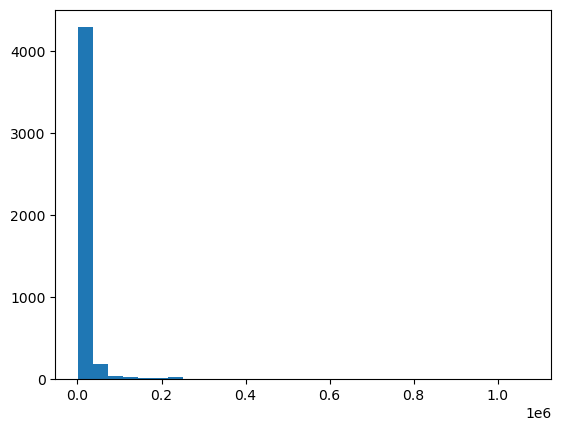

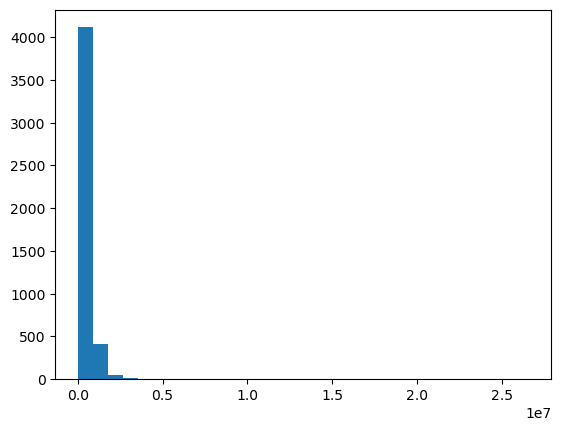

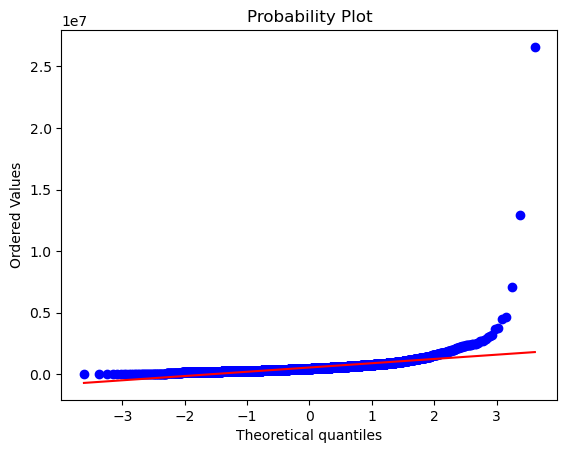

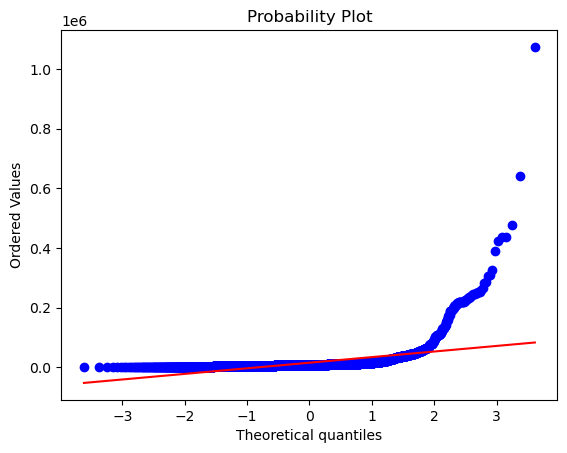

Data Normal: Shapiro-Wilk Test p-value = 0.0
Data Skewed: Shapiro-Wilk Test p-value = 0.0


In [24]:
#melihat distribusi data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Contoh data
data = df

# Histogram
plt.hist(data["sqft_lot"], bins=30)
plt.show()

plt.hist(data["price"], bins=30)
plt.show()

# QQ Plot
stats.probplot(data["price"], dist="norm", plot=plt)
plt.show()

stats.probplot(data["sqft_lot"], dist="norm", plot=plt)
plt.show()

# Shapiro-Wilk Test
stat, p = stats.shapiro(data["price"])
print("Data Normal: Shapiro-Wilk Test p-value =", p)

stat, p = stats.shapiro(data["sqft_lot"])
print("Data Skewed: Shapiro-Wilk Test p-value =", p)

In [25]:
df_num = df[numerical]
df_num

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800
...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020


In [26]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR=Q3-Q1
low_limit = Q1-(IQR*1.5)
high_limit = Q3 +(IQR*1.5)

In [27]:
x=((df_num < low_limit) | (df_num > high_limit))
x['res']=x.any(axis=1)
x

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,res
0,False,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,True,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4595,False,False,False,False,False,False,False,False,False,False,False,False
4596,False,False,False,False,False,False,False,False,False,False,False,False
4597,False,False,False,False,False,False,False,False,False,False,False,False
4598,False,False,False,False,False,False,False,False,False,False,False,False


In [28]:
df=df[df.index.isin(x[x.res==False].index.tolist())]
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement
0,2014-05-02 00:00:00,313000.000000,3.0,1.50,1340,7912,1.5,0,0,3,1340,0
2,2014-05-02 00:00:00,342000.000000,3.0,2.00,1930,11947,1.0,0,0,4,1930,0
3,2014-05-02 00:00:00,420000.000000,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000
4,2014-05-02 00:00:00,550000.000000,4.0,2.50,1940,10500,1.0,0,0,4,1140,800
5,2014-05-02 00:00:00,490000.000000,2.0,1.00,880,6380,1.0,0,0,3,880,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020


In [29]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Contoh data
data = df_num

# Membuat objek StandardScaler
scaler = StandardScaler()

# Melakukan transformasi data dengan StandardScaler
data_scaled = scaler.fit_transform(data)

# Membuat DataFrame baru dari data yang telah di-scaling
data_scaled_df = pd.DataFrame(data_scaled, columns=data.columns)

# Menampilkan hasil scaling
print("Data asli:")
print(data)
print("\nData setelah di-scaling:")
print(data_scaled_df)

Data asli:
             price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     3.130000e+05       3.0       1.50         1340      7912     1.5   
1     2.384000e+06       5.0       2.50         3650      9050     2.0   
2     3.420000e+05       3.0       2.00         1930     11947     1.0   
3     4.200000e+05       3.0       2.25         2000      8030     1.0   
4     5.500000e+05       4.0       2.50         1940     10500     1.0   
...            ...       ...        ...          ...       ...     ...   
4595  3.081667e+05       3.0       1.75         1510      6360     1.0   
4596  5.343333e+05       3.0       2.50         1460      7573     2.0   
4597  4.169042e+05       3.0       2.50         3010      7014     2.0   
4598  2.034000e+05       4.0       2.00         2090      6630     1.0   
4599  2.206000e+05       3.0       2.50         1490      8102     2.0   

      waterfront  view  condition  sqft_above  sqft_basement  
0              0     0          3    

In [30]:
df = data_scaled_df
df.to_csv("data clean.csv")

In [31]:
df = pd.read_csv("data clean.csv")
df

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement
0,0,-0.423864,-0.441122,-0.843204,-0.829971,-0.193434,-0.022416,-0.085004,-0.309194,-0.667112,-0.565224,-0.672464
1,1,3.249598,1.759705,0.432802,1.568528,-0.161718,0.906555,-0.085004,4.830079,2.286416,1.789559,-0.069128
2,2,-0.372424,-0.441122,-0.205201,-0.217367,-0.080978,-0.951388,-0.085004,-0.309194,0.809652,0.119171,-0.672464
3,3,-0.234071,-0.441122,0.113800,-0.144686,-0.190145,-0.951388,-0.085004,-0.309194,0.809652,-0.959621,1.482306
4,4,-0.003482,0.659291,0.432802,-0.206984,-0.121306,-0.951388,-0.085004,-0.309194,0.809652,-0.797222,1.051352
...,...,...,...,...,...,...,...,...,...,...,...,...
4595,4595,-0.432437,-0.441122,-0.524202,-0.653458,-0.236689,-0.951388,-0.085004,-0.309194,0.809652,-0.368025,-0.672464
4596,4596,-0.031271,-0.441122,0.432802,-0.705374,-0.202882,0.906555,-0.085004,-0.309194,-0.667112,-0.426025,-0.672464
4597,4597,-0.239562,-0.441122,0.432802,0.904009,-0.218462,0.906555,-0.085004,-0.309194,-0.667112,1.371962,-0.672464
4598,4598,-0.618268,0.659291,-0.205201,-0.051238,-0.229164,-0.951388,-0.085004,-0.309194,-0.667112,-0.878421,1.525401


In [32]:
df = df.drop("Unnamed: 0",axis=1)

In [33]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement
0,-0.423864,-0.441122,-0.843204,-0.829971,-0.193434,-0.022416,-0.085004,-0.309194,-0.667112,-0.565224,-0.672464
1,3.249598,1.759705,0.432802,1.568528,-0.161718,0.906555,-0.085004,4.830079,2.286416,1.789559,-0.069128
2,-0.372424,-0.441122,-0.205201,-0.217367,-0.080978,-0.951388,-0.085004,-0.309194,0.809652,0.119171,-0.672464
3,-0.234071,-0.441122,0.113800,-0.144686,-0.190145,-0.951388,-0.085004,-0.309194,0.809652,-0.959621,1.482306
4,-0.003482,0.659291,0.432802,-0.206984,-0.121306,-0.951388,-0.085004,-0.309194,0.809652,-0.797222,1.051352
...,...,...,...,...,...,...,...,...,...,...,...
4595,-0.432437,-0.441122,-0.524202,-0.653458,-0.236689,-0.951388,-0.085004,-0.309194,0.809652,-0.368025,-0.672464
4596,-0.031271,-0.441122,0.432802,-0.705374,-0.202882,0.906555,-0.085004,-0.309194,-0.667112,-0.426025,-0.672464
4597,-0.239562,-0.441122,0.432802,0.904009,-0.218462,0.906555,-0.085004,-0.309194,-0.667112,1.371962,-0.672464
4598,-0.618268,0.659291,-0.205201,-0.051238,-0.229164,-0.951388,-0.085004,-0.309194,-0.667112,-0.878421,1.525401


In [34]:
#MODEL ALGORITMA
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Load dataset
dataset = df

# Split dataset menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(dataset, dataset.price, test_size=0.3, random_state=42)

# Membuat objek Linear Regression dan melakukan training pada data training
lr = LinearRegression()
lr.fit(X_train, y_train)

# Memprediksi harga rumah menggunakan Linear Regression pada data testing
y_pred_lr = lr.predict(X_test)

# Menghitung mean squared error (MSE) pada Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)  # corrected variable name
print("MSE pada Linear Regression: ", mse_lr)
print("R2 SCORE",r2_lr)

# Membuat objek Random Forest Regression dan melakukan training pada data training
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)

# Memprediksi harga rumah menggunakan Random Forest Regression pada data testing
y_pred_rfr = rfr.predict(X_test)

# Menghitung mean squared error (MSE) pada Random Forest Regression
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
r2_rfr = r2_score(y_test, y_pred_rfr)  # corrected variable name
print("MSE pada Random Forest Regression: ", mse_rfr)
print("R2 SCORE", r2_rfr)  # corrected variable name


MSE pada Linear Regression:  5.166790597939284e-31
R2 SCORE 1.0
MSE pada Random Forest Regression:  1.2841268302995172
R2 SCORE 0.4350524699804088


In [35]:
#HYPERPARAMETER MODEL

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load dataset
X = df.drop('price', axis=1)
y = df['price']

# Preprocessing data menggunakan StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Membuat objek model regresi linear sederhana
model = LinearRegression(fit_intercept=True)

# Mencari kombinasi hyperparameter terbaik dengan grid search
param_grid = {'fit_intercept': [True, False]}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Mencetak hyperparameter terbaik dan skor terbaik
print("Hyperparameter terbaik: ", grid_search.best_params_)
print("Skor terbaik: ", -grid_search.best_score_)

# Memprediksi harga rumah pada data testing dengan model yang telah dioptimalkan
y_pred = grid_search.predict(X_test)

# Menghitung mean squared error pada model yang telah dioptimalkan
mse = mean_squared_error(y_test, y_pred)
print("MSE pada model Linear Regression yang telah dioptimalkan: ", mse**2)

Hyperparameter terbaik:  {'fit_intercept': False}
Skor terbaik:  0.2219814636780874
MSE pada model Linear Regression yang telah dioptimalkan:  4.5829830602175194


In [37]:
#memprediksi data set baru
# Load dataset baru
new_data = df

# Memisahkan variabel dependen dan variabel independen pada dataset baru
X_new = new_data.drop('price', axis=1)
y_new = new_data['price']

# Memprediksi harga rumah pada data set baru dengan model regresi linear sederhana yang telah dioptimalkan
y_pred_new = grid_search.predict(X_new)

# Menghitung mean squared error pada model yang telah dioptimalkan dengan data set baru
mse_new = mean_squared_error(y_new, y_pred_new)
print("MSE pada model Linear Regression yang telah dioptimalkan dengan data set baru: ", mse_new)

MSE pada model Linear Regression yang telah dioptimalkan dengan data set baru:  0.7947655137386637


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
